In [107]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,date
import pandas_datareader as pdr
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
start=datetime(2020,1,1)
end=datetime(2020,9,26)

In [51]:
data=pdr.data.DataReader('SBERP.ME','yahoo',start,end) 

In [52]:
df_sber=data.copy()

In [54]:
df_sber.insert(1,'Ticker','SBERP.ME')

In [64]:
del (df_sber['Adj Close'])

In [65]:
df_sber

,Ticker,Close
Date,,
2020-01-03,SBERP.ME,226.399994
2020-01-06,SBERP.ME,225.949997
2020-01-08,SBERP.ME,230.380005
2020-01-09,SBERP.ME,231.000000
2020-01-10,SBERP.ME,232.000000
...,...,...
2020-09-21,SBERP.ME,218.000000
2020-09-22,SBERP.ME,221.179993
2020-09-23,SBERP.ME,221.190002


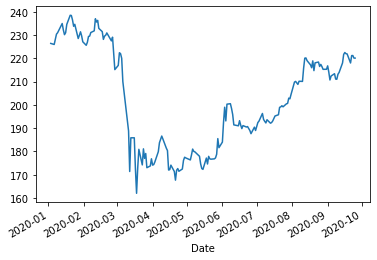

In [8]:
df_sber.plot()

In [21]:
data1=pdr.data.DataReader('YNDX.ME','yahoo',start,end)

In [26]:
df_ynd=pd.DataFrame

In [32]:
df_ynd=data1.copy()

In [49]:
del (df_ynd['Volume'])

In [50]:
df_ynd

,Ticker,Close
Date,,
2020-01-03,YNDX.ME,2685.000000
2020-01-06,YNDX.ME,2672.000000
2020-01-08,YNDX.ME,2677.000000
2020-01-09,YNDX.ME,2728.399902
2020-01-10,YNDX.ME,2725.000000
...,...,...
2020-09-21,YNDX.ME,4509.200195
2020-09-22,YNDX.ME,4538.600098
2020-09-23,YNDX.ME,5041.000000


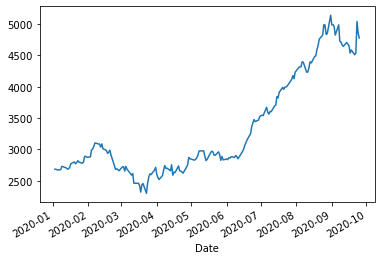

In [30]:
df_ynd.plot()

In [36]:
df_ynd.insert(1,'Ticker','YNDX.ME')

In [33]:
type(df_ynd)

pandas.core.frame.DataFrame

In [20]:
df_ynd.describe()

count      184.0
unique     178.0
top       2685.0
freq         3.0
Name: Close, dtype: float64

In [68]:
df=pd.concat([df_sber,df_ynd])

In [69]:
df

,Ticker,Close
Date,,
2020-01-03,SBERP.ME,226.399994
2020-01-06,SBERP.ME,225.949997
2020-01-08,SBERP.ME,230.380005
2020-01-09,SBERP.ME,231.000000
2020-01-10,SBERP.ME,232.000000
...,...,...
2020-09-21,YNDX.ME,4509.200195
2020-09-22,YNDX.ME,4538.600098
2020-09-23,YNDX.ME,5041.000000


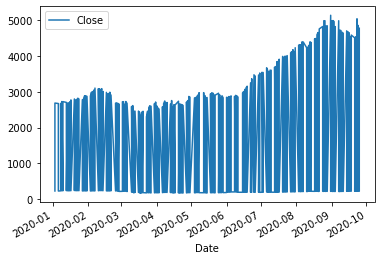

In [70]:
df.plot()

In [72]:
df1=df.pivot(columns='Ticker',values='Close')

In [73]:
df1

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-03,226.399994,2685.000000
2020-01-06,225.949997,2672.000000
2020-01-08,230.380005,2677.000000
2020-01-09,231.000000,2728.399902
2020-01-10,232.000000,2725.000000
...,...,...
2020-09-21,218.000000,4509.200195
2020-09-22,221.179993,4538.600098
2020-09-23,221.190002,5041.000000


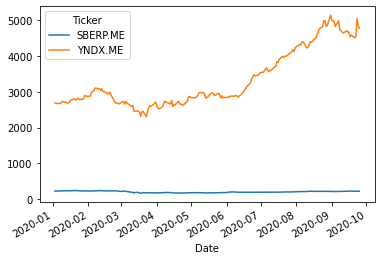

In [74]:
df1.plot()

In [75]:
daily_pdc=df1/df1.shift(1)-1

In [76]:
daily_pdc

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-03,NaN,NaN
2020-01-06,-0.001988,-0.004842
2020-01-08,0.019606,0.001871
2020-01-09,0.002691,0.019201
2020-01-10,0.004329,-0.001246
...,...,...
2020-09-21,-0.017575,-0.016747
2020-09-22,0.014587,0.006520
2020-09-23,0.000045,0.110695


In [80]:
df1.loc['2020-01-09']['YNDX.ME']/df1.loc['2020-01-08']['YNDX.ME']-1

0.019200561204239852

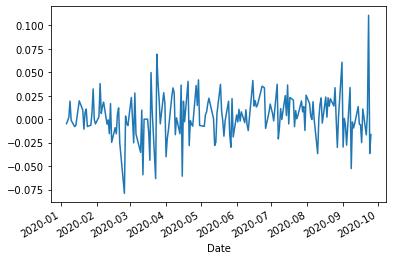

In [81]:
daily_pdc['YNDX.ME'].plot()

In [82]:
daily_cr=(1+daily_pdc).cumprod()

In [83]:
daily_cr[:5]

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-03,NaN,NaN
2020-01-06,0.998012,0.995158
2020-01-08,1.017580,0.997020
2020-01-09,1.020318,1.016164
2020-01-10,1.024735,1.014898


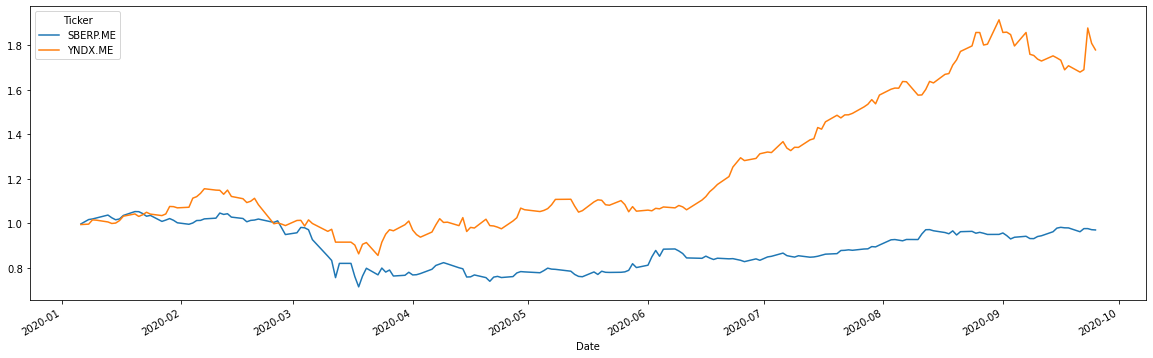

In [86]:
daily_cr.plot(figsize=(20,6))

In [87]:
monthly=df1.asfreq('M').ffill()

In [88]:
monthly[:5]

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-31,227.100006,2873.399902
2020-02-29,227.100006,2873.399902
2020-03-31,176.830002,2714.399902
2020-04-30,177.199997,2850.800049
2020-05-31,177.199997,2850.800049


In [89]:
monthly_pc=monthly/monthly.shift(1)-1

In [90]:
monthly_pc[:4]

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-31,NaN,NaN
2020-02-29,0.000000,0.000000
2020-03-31,-0.221356,-0.055335
2020-04-30,0.002092,0.050251


In [92]:
monthly_cr=(1+monthly_pc).cumprod()

In [93]:
monthly_cr[:4]

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-31,NaN,NaN
2020-02-29,1.000000,1.000000
2020-03-31,0.778644,0.944665
2020-04-30,0.780273,0.992135


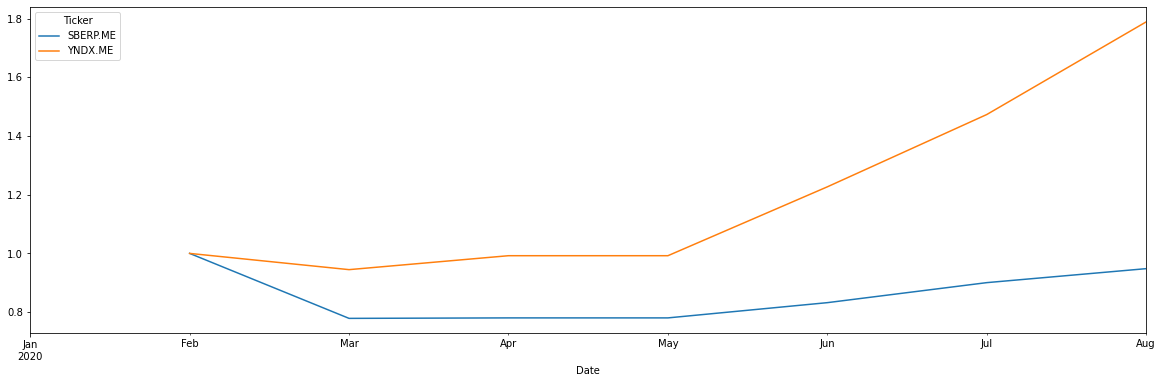

In [94]:
monthly_cr.plot(figsize=(20,6))

In [97]:
yndx=daily_pdc['YNDX.ME']

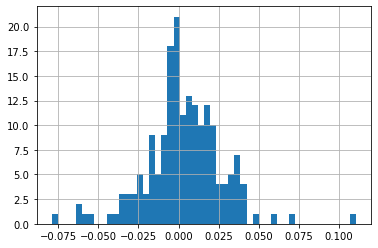

In [98]:
yndx.hist(bins=50)

In [99]:
sber=daily_pdc['SBERP.ME']

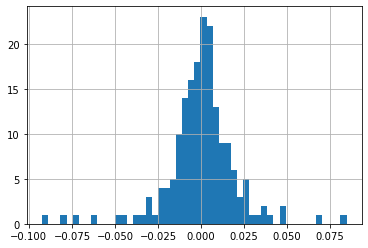

In [100]:
sber.hist(bins=50)

In [101]:
ynds_close=df1[['YNDX.ME']]['YNDX.ME']

In [102]:
ynds_close

Date
2020-01-03    2685.000000
2020-01-06    2672.000000
2020-01-08    2677.000000
2020-01-09    2728.399902
2020-01-10    2725.000000
                 ...     
2020-09-21    4509.200195
2020-09-22    4538.600098
2020-09-23    5041.000000
2020-09-24    4856.600098
2020-09-25    4776.799805
Name: YNDX.ME, Length: 183, dtype: float64

In [103]:
ma_30=ynds_close.rolling(window=30).mean()
ma_90=ynds_close.rolling(window=90).mean()

In [104]:
result=pd.DataFrame({'Close':ynds_close,
                    '30_ma_close':ma_30,
                    '90_ma_close':ma_90})

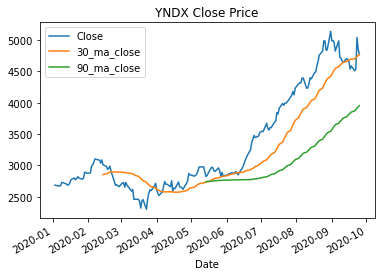

In [105]:
result.plot(title="YNDX Close Price")

Text(0, 0.5, 'SBERP.ME')

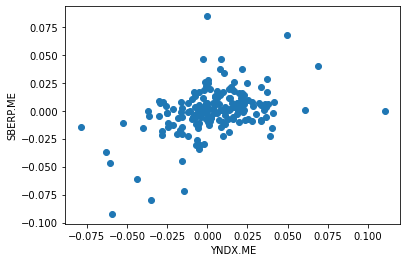

In [109]:
plt.scatter(daily_pdc['YNDX.ME'],daily_pdc['SBERP.ME'])
plt.xlabel('YNDX.ME')
plt.ylabel('SBERP.ME')

In [110]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8396994d30>,
      dtype=object)

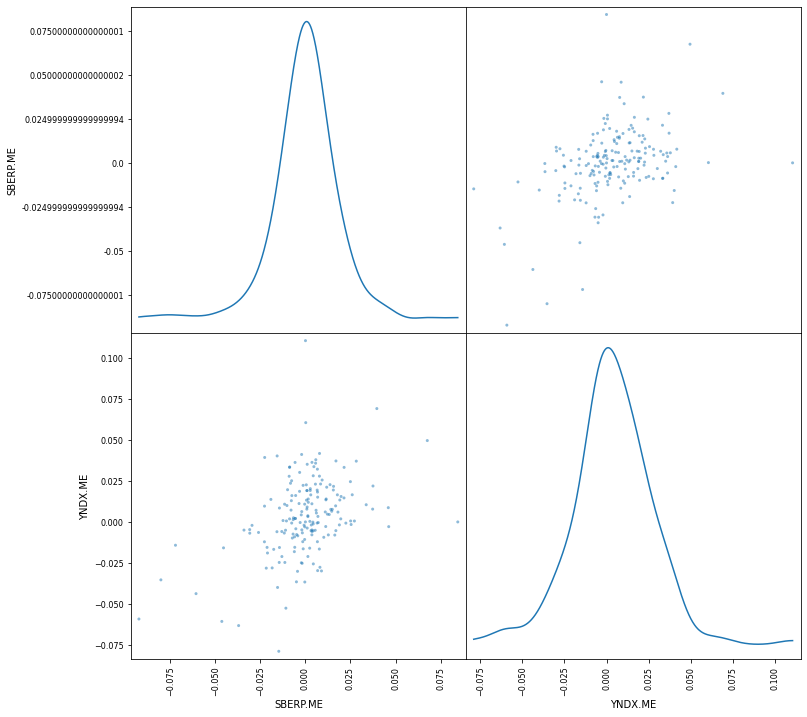

In [111]:
scatter_matrix(daily_pdc,diagonal='kde',figsize=(12,12))

In [112]:
corrs=daily_pdc.corr()

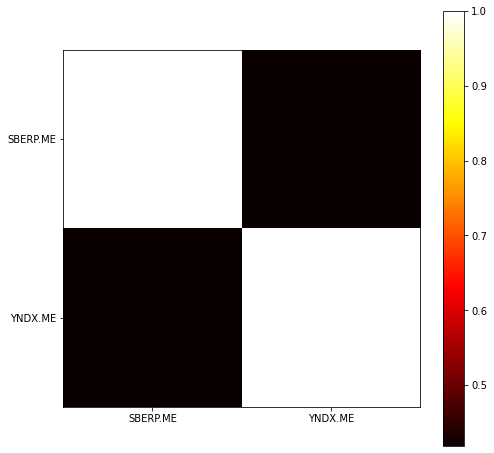

In [113]:
plt.imshow(corrs,cmap='hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns)
plt.yticks(range(len(corrs)),corrs.columns)
plt.gcf().set_size_inches(8,8)

In [114]:
min_periods=75

In [115]:
vol=daily_pdc.rolling(window=min_periods).std()*np.sqrt(min_periods)

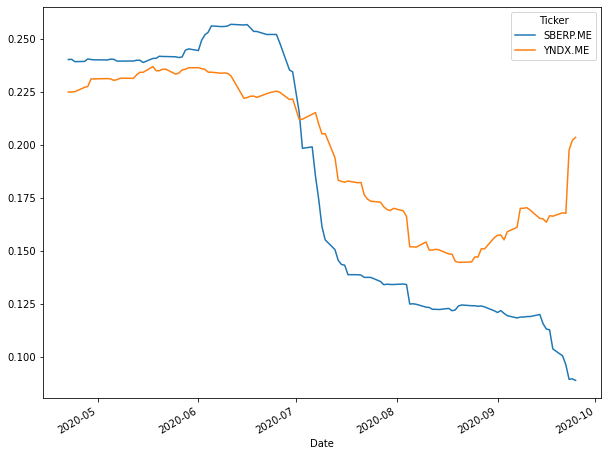

In [116]:
vol.plot(figsize=(10,8))

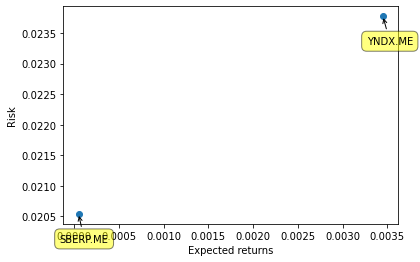

In [121]:
# строим диаграмму рассеяния, сопоставляя среднее и
# стандартное отклонение ежедневного процентного изменения
plt.scatter(daily_pdc.mean(), daily_pdc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# добавляем метки к каждой точке
for label, x, y in zip(daily_pdc.columns, 
                       daily_pdc.mean(), 
                       daily_pdc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))



In [118]:
daily_pdc

Ticker,SBERP.ME,YNDX.ME
Date,,
2020-01-03,NaN,NaN
2020-01-06,-0.001988,-0.004842
2020-01-08,0.019606,0.001871
2020-01-09,0.002691,0.019201
2020-01-10,0.004329,-0.001246
...,...,...
2020-09-21,-0.017575,-0.016747
2020-09-22,0.014587,0.006520
2020-09-23,0.000045,0.110695
